In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})
from scipy.optimize import curve_fit

In [2]:
# Import all data from each text file
# Append data to a large dataframe
data=pd.DataFrame({'canal1t': [],'canal2t': [],'canal3t': [],'canal4t': [],'canal1q' : [],'canal2q' : [],'canal3q' : [],'canal4q' : [],'tiempo' : []})

# List to iterate files
i_files=np.arange(1,25)

# Iterate each file and append the data to the main data frame
for i in i_files:
    cfile='12HORAS_12HORASDatos_'+str(i)+'.txt'
    df_aux=pd.read_csv(cfile, engine='python',sep="\t", decimal=',',usecols=[0,1,2,3,4,5,6,7,8])
    df_aux.columns = ["canal1t", "canal2t","canal3t","canal4t","canal1q", "canal2q","canal3q","canal4q","tiempo"]
    
    data=data.append(df_aux,ignore_index=True,sort=True)

In [3]:
# Choose data whose TDC is on range
# Choose data whose QDC is on range
print(len(data))
dataclean=data[(data.canal1t<4095.0)&(data.canal2t<4095.0)&(data.canal3t<4095.0)]
dataclean=data[(data.canal1t>0.0)&(data.canal2t>0.0)&(data.canal3t>0.0)]
dataclean=data[(data.canal1q<4095.0)&(data.canal2q<4095.0)&(data.canal3q<4095.0)]
print(len(dataclean))
data=dataclean

6340
5779


In [4]:
# Correction function based on Kobayashi/Sugitate 1990
def f1(qq,A0):
    toret=np.divide(A0,np.sqrt(qq))
    return toret

In [5]:
# Correction function based on Braunschweig 1976
def f2(qq,W,a0):
    toret=W*(1.0/np.sqrt(a0)-1/np.sqrt(qq))
    return toret

In [6]:
# Correction function based on Heilbronn 2004
def f3(qq,a1,a2,a3):
    toret=a1-a2*np.exp(a3/np.sqrt(qq))
    return toret

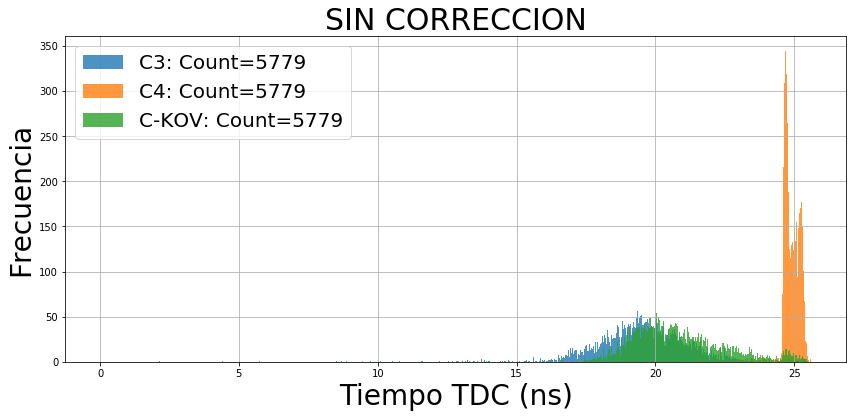

In [7]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal1t']*0.025,alpha=0.8,label='C3: Count='+str(len(data)),bins=np.arange(min(data['canal1t']*0.025), max(data['canal1t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal2t']*0.025,alpha=0.8,label='C4: Count='+str(len(data)),bins=np.arange(min(data['canal2t']*0.025), max(data['canal2t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal3t']*0.025,alpha=0.8,label='C-KOV: Count='+str(len(data)),bins=np.arange(min(data['canal3t']*0.025), max(data['canal3t']*0.025) + binwidth, binwidth))

plt.title('SIN CORRECCION',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [8]:
# Find out the t-peak for each detector
print(data['canal1t'].mean()*0.025)
print(data['canal2t'].mean()*0.025)
print(data['canal3t'].mean()*0.025)

19.58372123204707
24.836502855165254
20.781666378266138


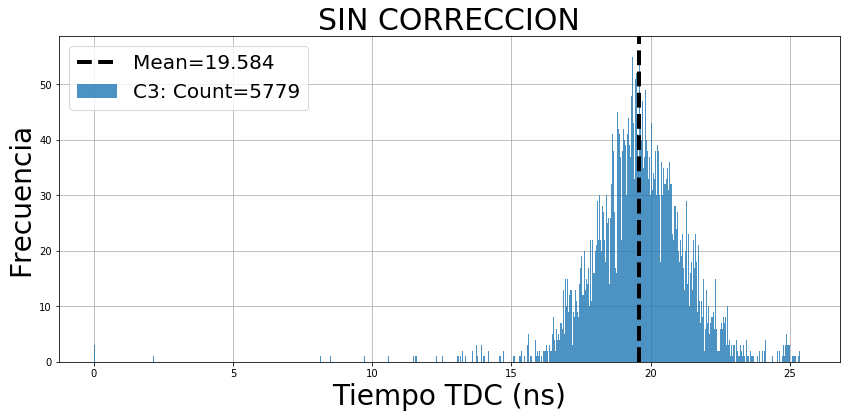

In [9]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal1t']*0.025,alpha=0.8,label='C3: Count='+str(len(data)),bins=np.arange(min(data['canal1t']*0.025), max(data['canal1t']*0.025) + binwidth, binwidth))

t1peak=data['canal1t'].mean()*0.025
plt.axvline(t1peak,label='Mean=%.3f'%t1peak,linestyle='--',color='black',linewidth=4)

plt.title('SIN CORRECCION',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

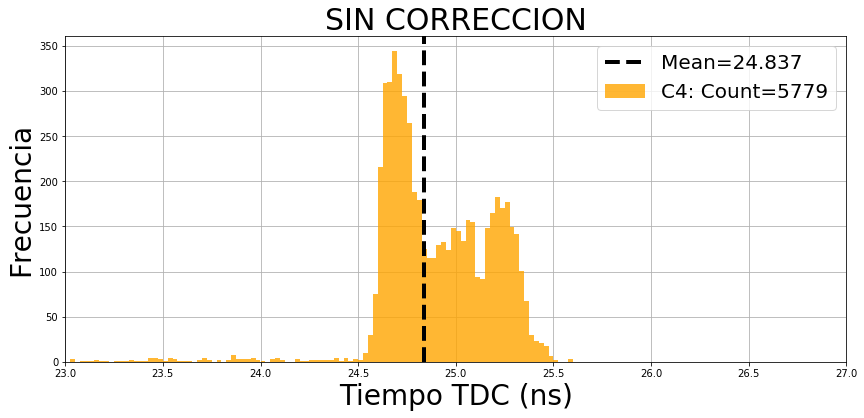

In [10]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal2t']*0.025,color='orange',alpha=0.8,label='C4: Count='+str(len(data)),bins=np.arange(min(data['canal2t']*0.025), max(data['canal2t']*0.025) + binwidth, binwidth))

t2peak=data['canal2t'].mean()*0.025
plt.axvline(t2peak,label='Mean=%.3f'%t2peak,linestyle='--',color='black',linewidth=4)

plt.title('SIN CORRECCION',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(23,27)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

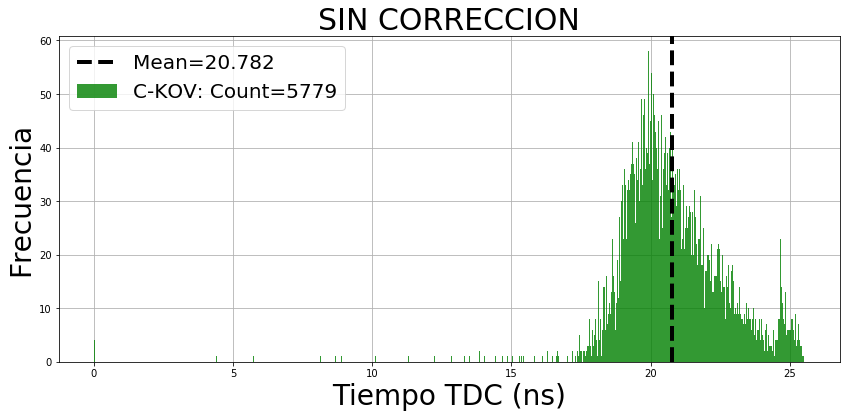

In [11]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal3t']*0.025,color='green',alpha=0.8,label='C-KOV: Count='+str(len(data)),bins=np.arange(min(data['canal3t']*0.025), max(data['canal3t']*0.025) + binwidth, binwidth))

t3peak=data['canal3t'].mean()*0.025
plt.axvline(t3peak,label='Mean=%.3f'%t3peak,linestyle='--',color='black',linewidth=4)

plt.title('SIN CORRECCION',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [12]:
data['dt1']=data['canal1t']-data['canal1t'].mean()
data['dt2']=data['canal2t']-data['canal2t'].mean()
data['dt3']=data['canal3t']-data['canal3t'].mean()

In [13]:
poptd31, pcovd31 = curve_fit(f1, data['canal1q'], data['dt1'])
print(poptd31)
data['1tcorr1']=data['canal1t']+f1(data['canal1q'],*poptd31)


poptd32, pcovd32 = curve_fit(f2, data['canal1q'], data['dt1'])
print(poptd32)
data['1tcorr2']=data['canal1t']+f2(data['canal1q'],*poptd32)


poptd33, pcovd33 = curve_fit(f3, data['canal1q'], data['dt1'])
print(poptd33)
data['1tcorr3']=data['canal1t']+f3(data['canal1q'],*poptd33)

[ 153.44164087]
[-3115.10500951   633.76858199]
[ 137.10055156  344.70992293  -23.78301167]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


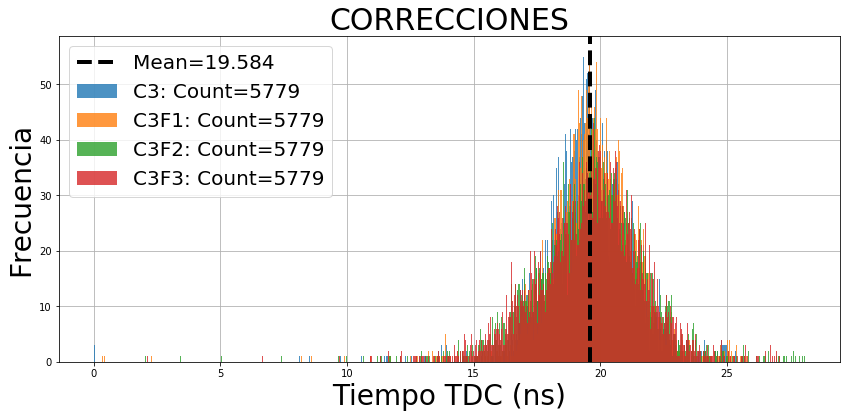

In [14]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal1t']*0.025,alpha=0.8,label='C3: Count='+str(len(data)),bins=np.arange(min(data['canal1t']*0.025), max(data['canal1t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['1tcorr1']*0.025,alpha=0.8,label='C3F1: Count='+str(len(data)),bins=np.arange(min(data['1tcorr1']*0.025), max(data['1tcorr1']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['1tcorr2']*0.025,alpha=0.8,label='C3F2: Count='+str(len(data)),bins=np.arange(min(data['1tcorr2']*0.025), max(data['1tcorr2']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['1tcorr3']*0.025,alpha=0.8,label='C3F3: Count='+str(len(data)),bins=np.arange(min(data['1tcorr3']*0.025), max(data['1tcorr3']*0.025) + binwidth, binwidth))


t1peak=data['canal1t'].mean()*0.025
plt.axvline(t1peak,label='Mean=%.3f'%t1peak,linestyle='--',color='black',linewidth=4)

plt.title('CORRECCIONES',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

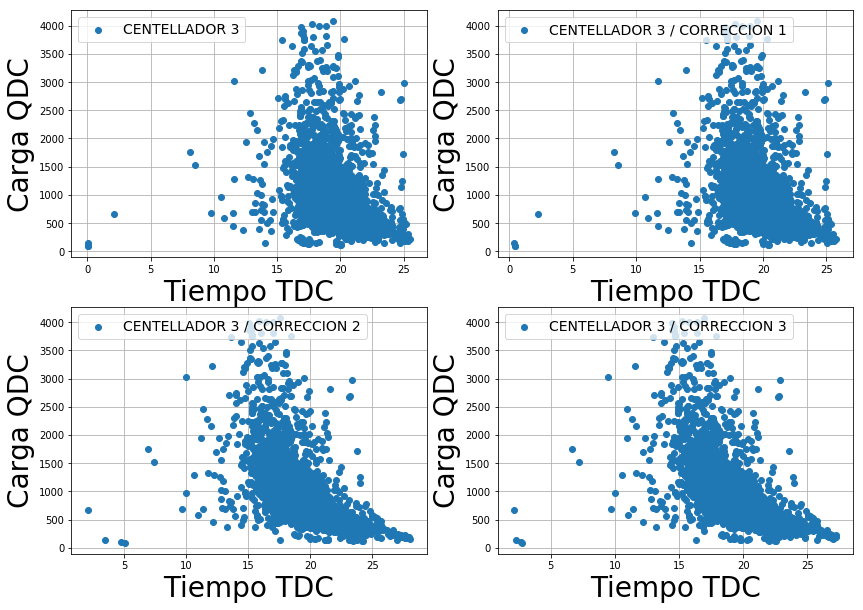

In [15]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.scatter(data['canal1t']*0.025,data['canal1q'],label='CENTELLADOR 3')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(222)
plt.scatter(data['1tcorr1']*0.025,data['canal1q'],label='CENTELLADOR 3 / CORRECCION 1')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(223)
plt.scatter(data['1tcorr2']*0.025,data['canal1q'],label='CENTELLADOR 3 / CORRECCION 2')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(224)
plt.scatter(data['1tcorr3']*0.025,data['canal1q'],label='CENTELLADOR 3 / CORRECCION 3')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.show()
plt.close()

In [22]:
poptd41, pcovd41 = curve_fit(f1, data['canal2q'], data['dt2'])
print(poptd41)
data['2tcorr1']=data['canal2t']+f1(data['canal2q'],*poptd41)


poptd42, pcovd42 = curve_fit(f2, data['canal2q'], data['dt2'])
print(poptd42)
data['2tcorr2']=data['canal2t']+f2(data['canal2q'],*poptd42)


poptd43, pcovd43 = curve_fit(f3, data['canal2q'], data['dt2'])
print(poptd43)
data['2tcorr3']=data['canal2t']+f3(data['canal2q'],*poptd43)

[-22.31614142]
[ 169.79078897  957.67909151]
[  6.09703695e+03   6.09155595e+03   2.78277148e-02]


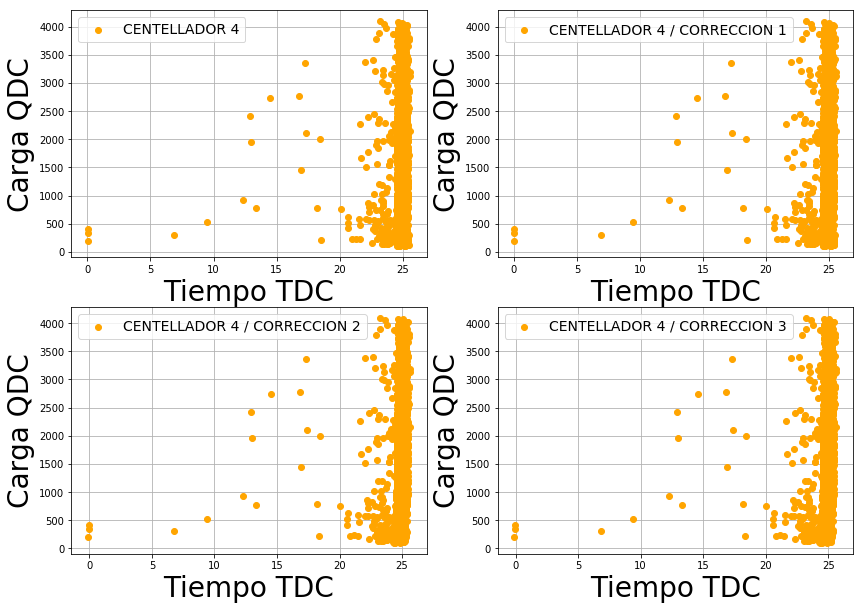

In [23]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.scatter(data['canal2t']*0.025,data['canal2q'],label='CENTELLADOR 4',color='orange')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(222)
plt.scatter(data['2tcorr1']*0.025,data['canal2q'],label='CENTELLADOR 4 / CORRECCION 1',color='orange')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(223)
plt.scatter(data['2tcorr2']*0.025,data['canal2q'],label='CENTELLADOR 4 / CORRECCION 2',color='orange')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(224)
plt.scatter(data['2tcorr3']*0.025,data['canal2q'],label='CENTELLADOR 4 / CORRECCION 3',color='orange')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.show()
plt.close()

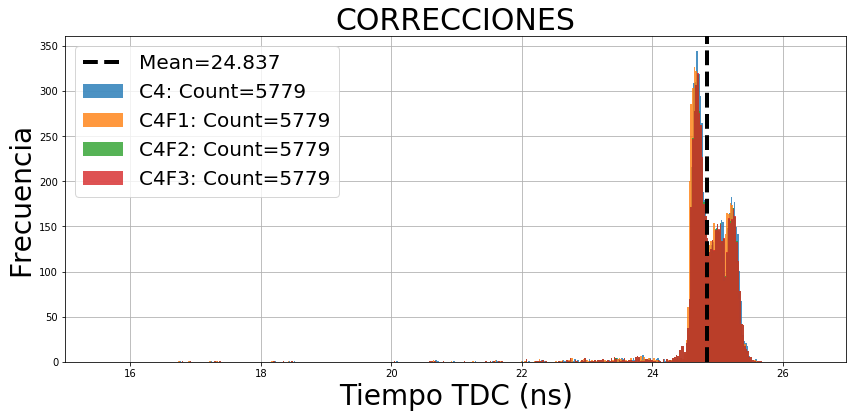

In [24]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal2t']*0.025,alpha=0.8,label='C4: Count='+str(len(data)),bins=np.arange(min(data['canal2t']*0.025), max(data['canal2t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['2tcorr1']*0.025,alpha=0.8,label='C4F1: Count='+str(len(data)),bins=np.arange(min(data['2tcorr1']*0.025), max(data['2tcorr1']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['2tcorr2']*0.025,alpha=0.8,label='C4F2: Count='+str(len(data)),bins=np.arange(min(data['2tcorr2']*0.025), max(data['2tcorr2']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['2tcorr3']*0.025,alpha=0.8,label='C4F3: Count='+str(len(data)),bins=np.arange(min(data['2tcorr3']*0.025), max(data['2tcorr3']*0.025) + binwidth, binwidth))


t1peak=data['canal2t'].mean()*0.025
plt.axvline(t1peak,label='Mean=%.3f'%t2peak,linestyle='--',color='black',linewidth=4)

plt.title('CORRECCIONES',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(15)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [25]:
poptdc1, pcovdc1 = curve_fit(f1, data['canal3q'], data['dt3'])
print(poptdc1)
data['3tcorr1']=data['canal3t']+f1(data['canal3q'],*poptdc1)


poptdc2, pcovdc2 = curve_fit(f2, data['canal3q'], data['dt3'])
print(poptdc2)
data['3tcorr2']=data['canal3t']+f2(data['canal3q'],*poptdc2)


poptdc3, pcovdc3 = curve_fit(f3, data['canal3q'], data['dt3'])
print(poptdc3)
data['3tcorr3']=data['canal3t']+f3(data['canal3q'],*poptdc3)

[ 345.27929844]
[-2550.6034278    593.23667524]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


[ 144.95907769  341.48903523  -22.24712264]


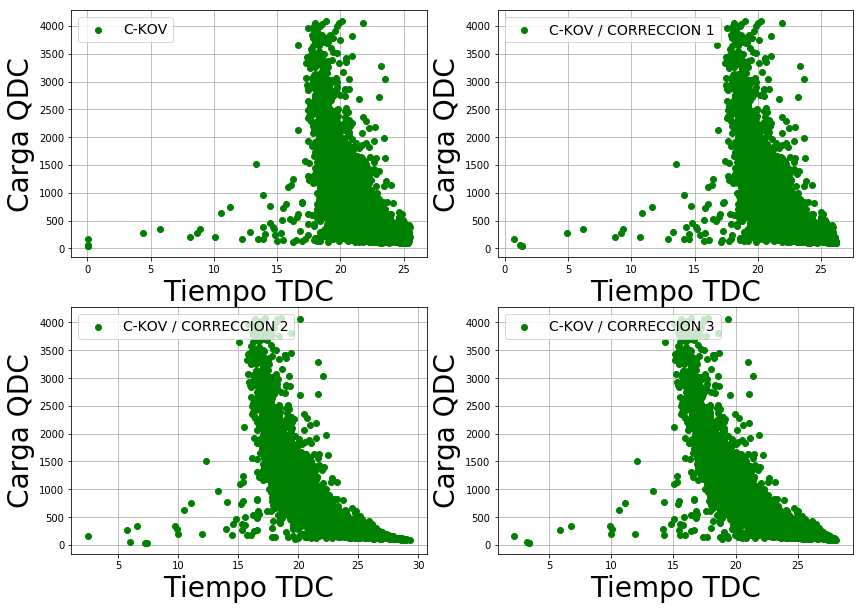

In [26]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.scatter(data['canal3t']*0.025,data['canal3q'],label='C-KOV',color='green')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(222)
plt.scatter(data['3tcorr1']*0.025,data['canal3q'],label='C-KOV / CORRECCION 1',color='green')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(223)
plt.scatter(data['3tcorr2']*0.025,data['canal3q'],label='C-KOV / CORRECCION 2',color='green')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.subplot(224)
plt.scatter(data['3tcorr3']*0.025,data['canal3q'],label='C-KOV / CORRECCION 3',color='green')
plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)
plt.legend(fontsize=14,loc=2)
plt.grid(True)

plt.show()
plt.close()

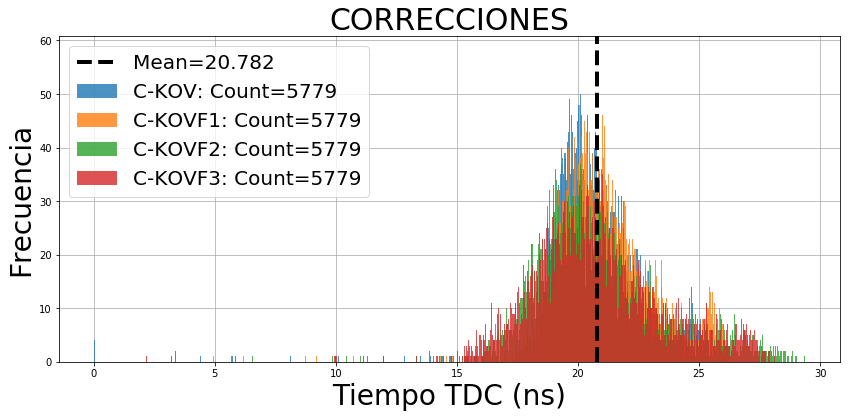

In [27]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal3t']*0.025,alpha=0.8,label='C-KOV: Count='+str(len(data)),bins=np.arange(min(data['canal3t']*0.025), max(data['canal3t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['3tcorr1']*0.025,alpha=0.8,label='C-KOVF1: Count='+str(len(data)),bins=np.arange(min(data['3tcorr1']*0.025), max(data['3tcorr1']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['3tcorr2']*0.025,alpha=0.8,label='C-KOVF2: Count='+str(len(data)),bins=np.arange(min(data['3tcorr2']*0.025), max(data['3tcorr2']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['3tcorr3']*0.025,alpha=0.8,label='C-KOVF3: Count='+str(len(data)),bins=np.arange(min(data['3tcorr3']*0.025), max(data['3tcorr3']*0.025) + binwidth, binwidth))


t1peak=data['canal3t'].mean()*0.025
plt.axvline(t1peak,label='Mean=%.3f'%t3peak,linestyle='--',color='black',linewidth=4)

plt.title('CORRECCIONES',fontsize=30)
plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

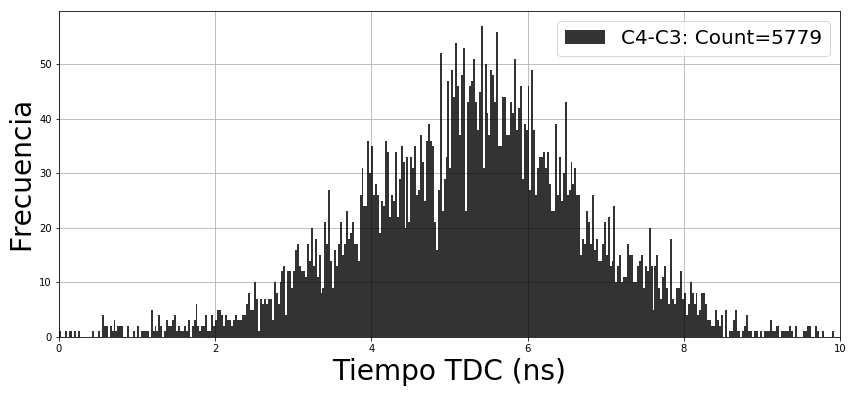

In [29]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist((data['canal2t']-data['canal1t'])*0.025,alpha=0.8,color='black',label='C4-C3: Count='+str(len(data)),bins=np.arange(min((data['canal2t']-data['canal1t'])*0.025), max((data['canal2t']-data['canal1t'])*0.025) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(0,10)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

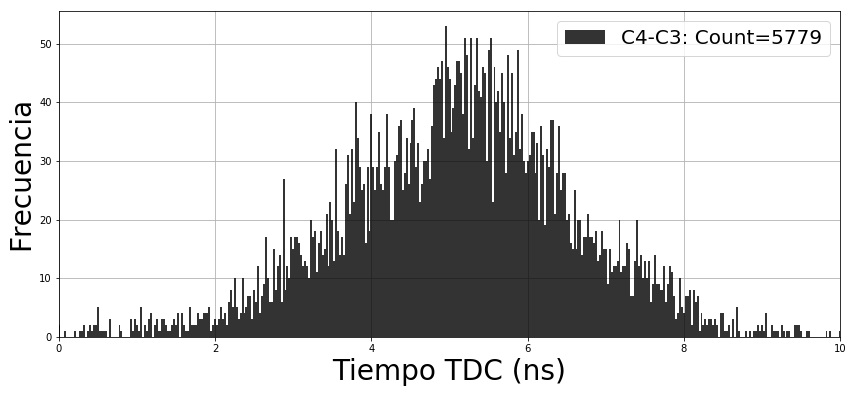

In [34]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist((data['2tcorr1']-data['1tcorr1'])*0.025,alpha=0.8,color='black',label='C4-C3: Count='+str(len(data)),bins=np.arange(min((data['2tcorr1']-data['1tcorr1'])*0.025), max((data['2tcorr1']-data['1tcorr1'])*0.025) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(0,10)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

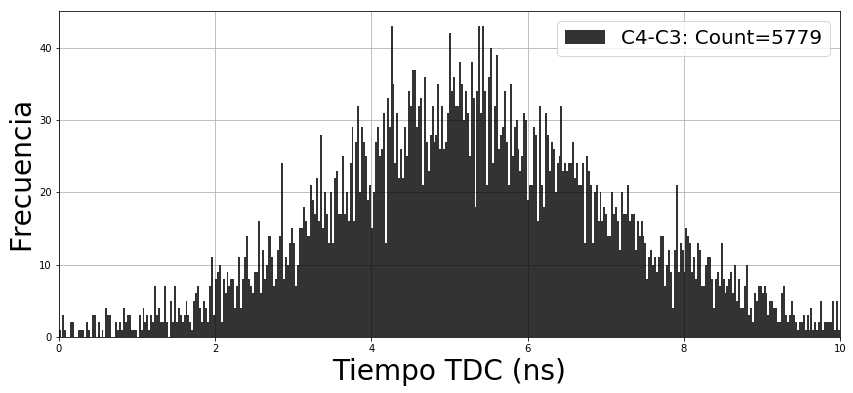

In [35]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist((data['2tcorr2']-data['1tcorr2'])*0.025,alpha=0.8,color='black',label='C4-C3: Count='+str(len(data)),bins=np.arange(min((data['2tcorr2']-data['1tcorr2'])*0.025), max((data['2tcorr2']-data['1tcorr2'])*0.025) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(0,10)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

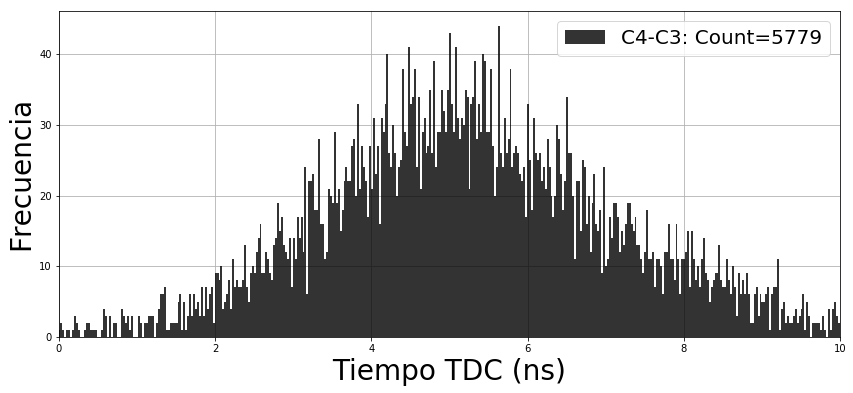

In [37]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist((data['2tcorr3']-data['1tcorr3'])*0.025,alpha=0.8,color='black',label='C4-C3: Count='+str(len(data)),bins=np.arange(min((data['2tcorr3']-data['1tcorr3'])*0.025), max((data['2tcorr3']-data['1tcorr3'])*0.025) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(0,10)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

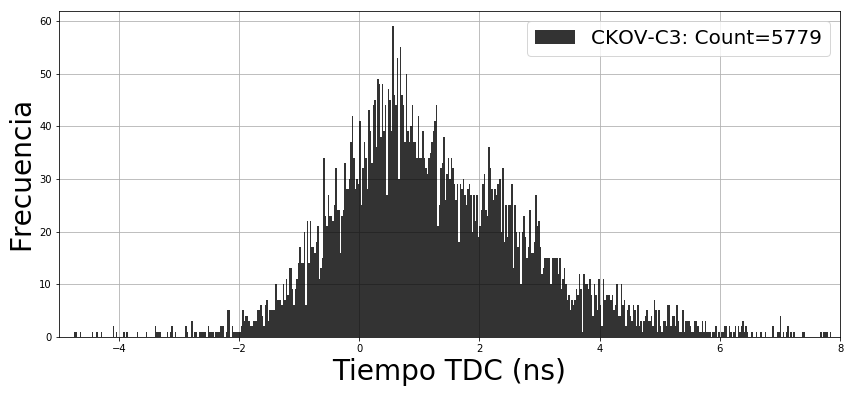

In [33]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist((data['canal3t']-data['canal1t'])*0.025,alpha=0.8,color='black',label='CKOV-C3: Count='+str(len(data)),bins=np.arange(min((data['canal3t']-data['canal1t'])*0.025), max((data['canal3t']-data['canal1t'])*0.025) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.xlim(-5,8)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()